# Амангелді Нұрғалым - СИБ 23-01

### Используемые библиотеки

In [1]:
import pandas as pd
import numpy as np
import pymorphy2
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from collections import Counter
import re

### Загружаем и готовим набор данных

In [8]:
data = pd.read_csv('/Users/LENOVO/DESKTOP/Весь материал Нургалыма/jupyter/Social Extremism/Nurgalym_1000_extremism.csv')
data.head()

,Текст
0,Из горнила гражданской войны в Сирии и недово...
1,"Сегодня утром я выступаю с большой скорбью, бо..."
2,"""Сегодня я санкционировал две операции в Ираке..."
3,"Еврейский крестоносец, бывший госсекретарь США..."
4,"На данный момент, однако, начало мудрости зак..."


### Обработка текстовых данных

In [9]:
def preprocess(text, stop_words, punctuation_marks, morph):
    tokens = word_tokenize(text.lower())
    preprocessed_text = []
    for token in tokens:
        if token not in punctuation_marks:
            lemma = morph.parse(token)[0].normal_form
            if lemma not in stop_words:
                preprocessed_text.append(lemma)
    return preprocessed_text

In [10]:
punctuation_marks = ['!', ',', '(', ')', ':', '-', '?', '.', '..', '...', '«', '»', ';', '–', '--']
stop_words = stopwords.words("russian")
morph = pymorphy2.MorphAnalyzer()

In [13]:
data['Текст'] = data['Текст'].str.replace(r'[^\w\s]+', '',regex = True)
data['Preprocessed_texts'] = data.apply(lambda row: preprocess(row['Текст'], punctuation_marks, stop_words, morph), axis=1)
data.head()

,Текст,Preprocessed_texts
0,Из горнила гражданской войны в Сирии и недовол...,"[горнило, гражданский, война, сирия, недовольс..."
1,Сегодня утром я выступаю с большой скорбью бол...,"[сегодня, утром, выступать, большой, скорбь, б..."
2,Сегодня я санкционировал две операции в Ираке ...,"[сегодня, санкционировать, два, операция, ирак..."
3,Еврейский крестоносец бывший госсекретарь США ...,"[еврейский, крестоносец, бывший, госсекретарь,..."
4,На данный момент однако начало мудрости заключ...,"[данный, момент, однако, начало, мудрость, зак..."


In [14]:
data.to_csv('Нургалым1000_clean_corpus.csv', index=False)

### WordCloud - Визуализация данных (Облако слов) 
#### 50 слов, которые часто встречаются после обработки текстовых данных (Из столбца 'Preprocessed_texts')

In [15]:
text = ' '.join(data['Preprocessed_texts'].apply(lambda x: ' '.join(x)))

In [16]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50).generate(text) 

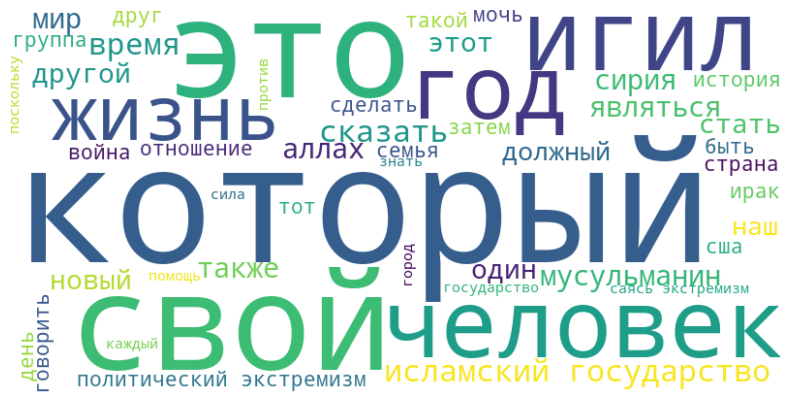

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # линейная алгебра
import pandas as pd # обработка данных, ввод-вывод CSV-файла (например, pd.read_csv)

# Библиотеки визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Библиотеки машинного обучения
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2,f_classif
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

import pickle
import string

# Библиотеки для обработки текста
import nltk
from nltk.stem import PorterStemmer
import os

In [20]:
df=pd.read_csv('/Users/LENOVO/DESKTOP/Весь материал Нургалыма/jupyter/Social Extremism/Class_Extremism.csv')
df.head()

,Текст,Preprocessed_texts,label
0,Из горнила гражданской войны в Сирии и недовол...,"['горнило', 'гражданский', 'война', 'сирия', '...",1
1,Сегодня утром я выступаю с большой скорбью бол...,"['сегодня', 'утром', 'выступать', 'большой', '...",1
2,Сегодня я санкционировал две операции в Ираке ...,"['сегодня', 'санкционировать', 'два', 'операци...",1
3,Еврейский крестоносец бывший госсекретарь США ...,"['еврейский', 'крестоносец', 'бывший', 'госсек...",1
4,На данный момент однако начало мудрости заключ...,"['данный', 'момент', 'однако', 'начало', 'мудр...",1


In [21]:
df.shape

(2000, 3)

In [22]:
df['label'].value_counts()

1    1000
0    1000
Name: label, dtype: int64

1    1000
0    1000
Name: label, dtype: int64


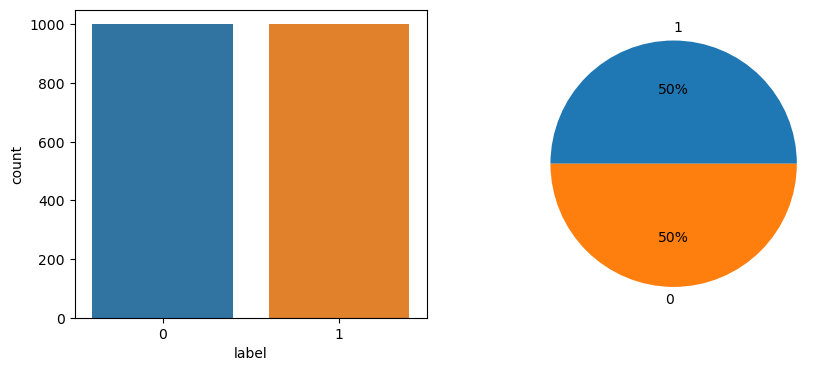

In [23]:
classCnt = df['label'].value_counts()
print(classCnt)

plt.figure(figsize=((10,4)))

plt.subplot(1,2,1)
sns.countplot(df,x='label')

plt.subplot(1,2,2)
plt.pie(classCnt,labels = classCnt.index,autopct='%.0f%%')

plt.show()

# Машинное обучение - Выбор модели

In [24]:
x,y = df['Preprocessed_texts'],df['label']

# TF-IDF-векторизатор

In [25]:
vectorizer = TfidfVectorizer(min_df=0.01,max_features=1000)
x =  vectorizer.fit_transform(x).toarray()

In [26]:
# Save the model
with open('tfidf.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

## Разделение данных на train и test

In [27]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=7)

In [28]:
X_train.shape,X_test.shape

((1600, 449), (400, 449))

## Наивный Байесовский классификатор (классификатор голосования)

In [29]:
nb = GaussianNB()
nb2 = BernoulliNB()
nb3 = MultinomialNB()
VotingClassifiers = VotingClassifier(estimators=[('GaussianNB', nb),('BernoulliNB',nb2), ('MultinomialNB', nb3)], voting = 'soft')
VotingClassifiers.fit(X_train, y_train)
print('Training score:',VotingClassifiers.score(X_train, y_train))
print('Testing score:',VotingClassifiers.score(X_test,y_test))

Training score: 0.96125
Testing score: 0.9525


              precision    recall  f1-score   support

           0       0.94      0.97      0.95       202
           1       0.96      0.94      0.95       198

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



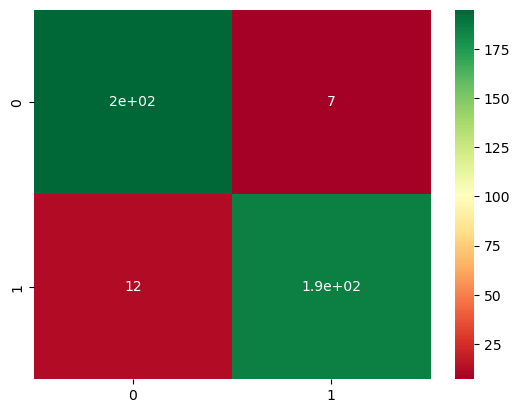

In [30]:
y_act=y_test
y_pred=VotingClassifiers.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='RdYlGn')
print(classification_report(y_act,y_pred))

## Random Forest

In [31]:
classifiers = RandomizedSearchCV(RandomForestClassifier(),{'n_estimators':[4,5],'criterion':['entropy'],
                                                      'max_depth':range(1,4),'min_samples_split':range(2,5)},random_state=10)
classifiers.fit(X_train, y_train)
print('Training score:',classifiers.score(X_train, y_train))
print('Testing score:',classifiers.score(X_test,y_test))
print(classifiers.best_estimator_)

Training score: 0.825
Testing score: 0.8225
RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=5)


              precision    recall  f1-score   support

           0       0.75      0.99      0.85       202
           1       0.98      0.66      0.79       198

    accuracy                           0.82       400
   macro avg       0.86      0.82      0.82       400
weighted avg       0.86      0.82      0.82       400



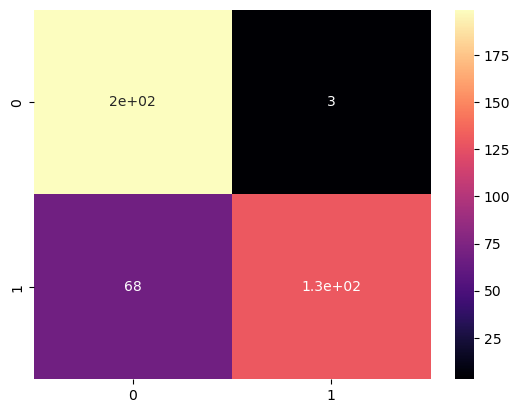

In [32]:
y_act=y_test
y_pred=classifiers.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='magma')
print(classification_report(y_act,y_pred))

## Decision Tree (Дерево решений)

In [33]:
model2 = DecisionTreeClassifier(criterion='gini',splitter='random',min_samples_leaf=70,max_depth=4,random_state=7)
model2.fit(X_train, y_train)
print(model2.score(X_train, y_train))
print(model2.score(X_test,y_test))

0.68875
0.67


              precision    recall  f1-score   support

           0       0.60      1.00      0.75       202
           1       1.00      0.33      0.50       198

    accuracy                           0.67       400
   macro avg       0.80      0.67      0.63       400
weighted avg       0.80      0.67      0.63       400



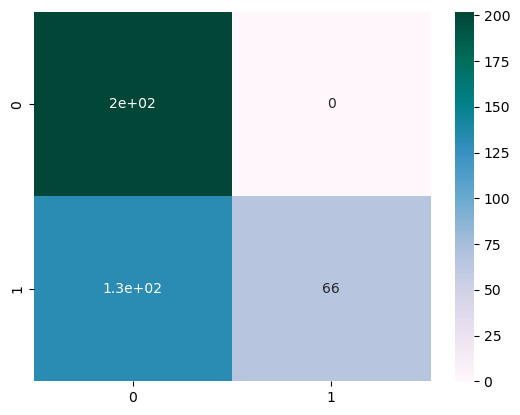

In [34]:
y_act=y_test
y_pred=model2.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='PuBuGn')
print(classification_report(y_act,y_pred))

## Gradient Boosting (Повышение градиента)

In [35]:
model3 = RandomizedSearchCV(GradientBoostingClassifier(),{"learning_rate": range(3,5),
                "max_depth":[200],"max_features":range(6,10,2),
                 "n_estimators":[10]},random_state=0,n_jobs=-1)
model3.fit(X_train,y_train)
print('Training score:',model3.score(X_train,y_train))
print('Testing score:',model3.score(X_test,y_test))
model3.best_params_

Training score: 0.9975
Testing score: 0.9325


{'n_estimators': 10, 'max_features': 8, 'max_depth': 200, 'learning_rate': 3}

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       202
           1       0.96      0.90      0.93       198

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



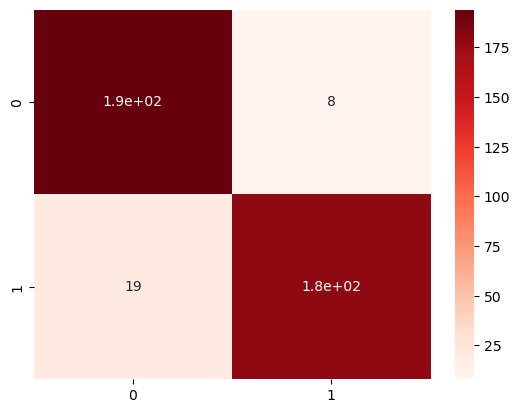

In [36]:
#матрица путаницы и отчет о классификации
y_act=y_test
y_pred=model3.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='Reds')
print(classification_report(y_act,y_pred))

## K-Nearest Neighbour (K-Ближайший сосед)

In [37]:
model = RandomizedSearchCV(KNeighborsClassifier(),{'n_neighbors':[8],'metric':['manhattan','minkowski','cosine','tanimoto'],
                                                   'p':[1,2]},random_state=0,n_jobs=-1)
model.fit(X_train, y_train)
print('Training score:',model.score(X_train, y_train))
print('Testing score:',model.score(X_test,y_test))
print(model.best_estimator_)

Training score: 0.9425
Testing score: 0.935
KNeighborsClassifier(metric='cosine', n_neighbors=8, p=1)


              precision    recall  f1-score   support

           0       0.92      0.95      0.94       202
           1       0.95      0.92      0.93       198

    accuracy                           0.94       400
   macro avg       0.94      0.93      0.93       400
weighted avg       0.94      0.94      0.93       400



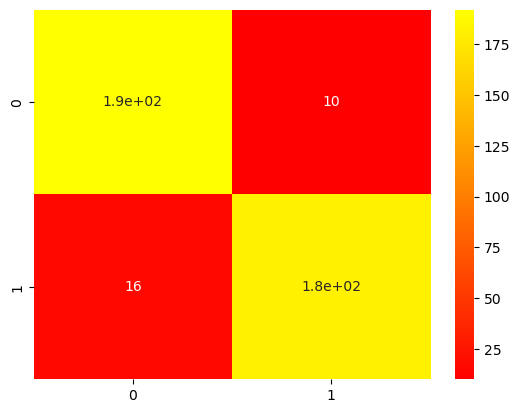

In [38]:
y_act = y_test
y_pred = model.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='autumn')
print(classification_report(y_act,y_pred))

# Вывод
### Исходя из вышеизложенного, мы можем сказать, что из всех моделей наивный Байес (классификатор голосования) является наиболее подходящей моделью для набора данных.
### Оценка за обучение: 0.96125
### Результат тестирования: 0.9525
### Точность : 95%

# Анализатор текста с моделью Naive Bayes

In [39]:
with open('tfidf.pkl', 'wb') as f:
    pickle.dump(VotingClassifiers, f)

In [43]:
# Пример функции для лемматизации слова
def lemmatize_word(word):
    parsed_word = morph.parse(word)[0]
    return parsed_word.normal_form

In [47]:
def preprocess(inp):
    inp = inp.lower() #преобразовать в нижний регистр
    inp = inp.replace(r'[^\w\s]+', '') #убрать знаки препинания
    inp = [word for word in inp.split() if word not in (stop_words)] #токенизация предложение
    inp = ' '.join(lemmatize_word(i) for i in inp) #стемминг
    inputToModel = vectorizer.transform([inp]).toarray() #преобразовать в векторную форму
    return inputToModel

In [48]:
def app(input_text):
    # Определите текстовое поле ввода
    print('Напиши : ',input_text) #принимать вводимые данные от пользователя
    processed_array = preprocess(input_text) #предварительная обработка текста
    predict = VotingClassifiers.predict(processed_array) #Прогнозирование модели
    print('Вывод : ', predict[0])

In [49]:
app('Выходим на митинг 31 июля возле акимата')

Напиши :  Выходим на митинг 31 июля возле акимата
Вывод :  1


In [50]:
app('Помощник шерифа Рик Граймс выходит из комы и обнаруживает постапокалиптический мир в котором правят плотоядные зомби')

Напиши :  Помощник шерифа Рик Граймс выходит из комы и обнаруживает постапокалиптический мир в котором правят плотоядные зомби
Вывод :  0


In [52]:
app('Если вы можете убить неверующего американца или европейца которые вступили против Исламского государства, то  убейте его любым способом, каким бы это ни было')

Напиши :  Если вы можете убить неверующего американца или европейца которые вступили против Исламского государства, то  убейте его любым способом, каким бы это ни было
Вывод :  1


In [53]:
app('Соник и его друзья объединяются с 12летним Кристофером чтобы собрать все Изумруды Хаоса и победить злого доктора Эггмана')

Напиши :  Соник и его друзья объединяются с 12летним Кристофером чтобы собрать все Изумруды Хаоса и победить злого доктора Эггмана
Вывод :  0
